In [1]:
# Проверка версий
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn_version}")

NumPy version: 2.3.0
Pandas version: 2.3.0
Scikit-learn version: 1.7.0


# Задание 2: Разведочный анализ данных

## Загрузка и первичный анализ набора данных

In [2]:
# Загрузка данных
df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [3]:
# Показать все колонки 
#None - без ограничений
pd.set_option('display.max_columns', None) 

# Показать все строки
pd.set_option('display.max_rows', None)

# Увеличить максимальную ширину вывода
#pd.set_option('display.width', 120)

# Установить максимальную ширину колонки
#pd.set_option('display.max_colwidth', None)

In [4]:
# Просмотр первых строк
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [5]:
# Информация о структуре данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Статистическое описание
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [7]:
# Проверка пропущенных значений
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Визуализация данных

### Настройка стиля

In [8]:
# Настройка стиля

# sns.set_style('whitegrid')  # Белая сетка
# sns.set_style('darkgrid')   # Темная сетка
# sns.set_style('white')      # Белый фон
# sns.set_style('dark')       # Темный фон
# sns.set_style('ticks')      # С засечками

sns.set_style('dark')
sns.set(font_scale=1.2) # размер шрифта 120%

### Гистограммы числовых признаков

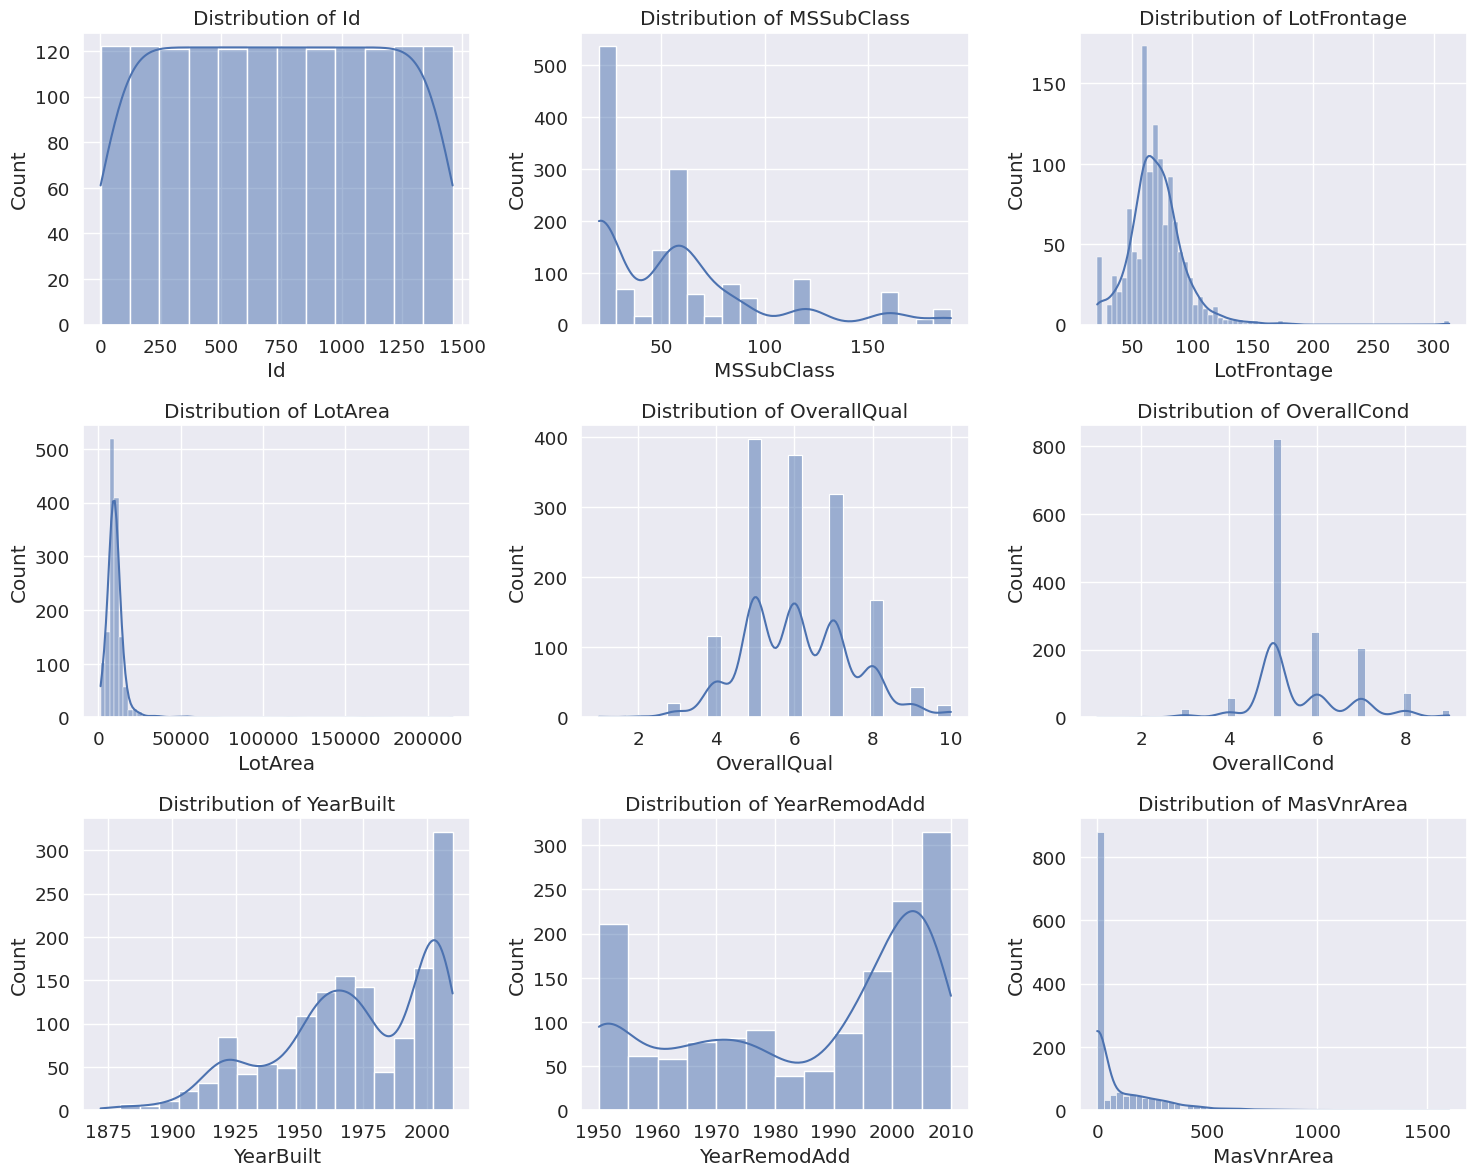

In [9]:
# Гистограммы числовых признаков

# возвращает 2 объекта. fig - размеры и сетку графиков
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 

# Преобразует двумерный массив axes в одномерный, 
# чтобы упростить доступ к каждому подграфику по индексу.
axes = axes.flatten() 

# Выбирает все колонки из DataFrame df, которые имеют тип данных float64 
# (числа с плавающей точкой) и int64 (целые числа).
# .columns - Получает список названий выбранных колонок.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Перебирает первые 9 числовых колонок, 
# используя enumerate() для получения индекса i и названия колонки col.
for i, col in enumerate(numeric_cols[:9]):
    # Строит гистограмму для текущей колонки col из DataFrame df.
    # kde=True добавляет линию плотности (Kernel Density Estimate) для визуализации распределения данных.
    # ax=axes[i] указывает, что график должен быть нарисован на соответствующем подграфике.
    sns.histplot(df[col], kde=True, ax=axes[i])
    # Устанавливает заголовок для текущего подграфика
    axes[i].set_title(f'Distribution of {col}')

#Автоматически подстраивает параметры подграфиков, 
# чтобы избежать наложения элементов и улучшить внешний вид.
plt.tight_layout()
# Отображает все графики на экране.
plt.show()

### Матрица корреляций

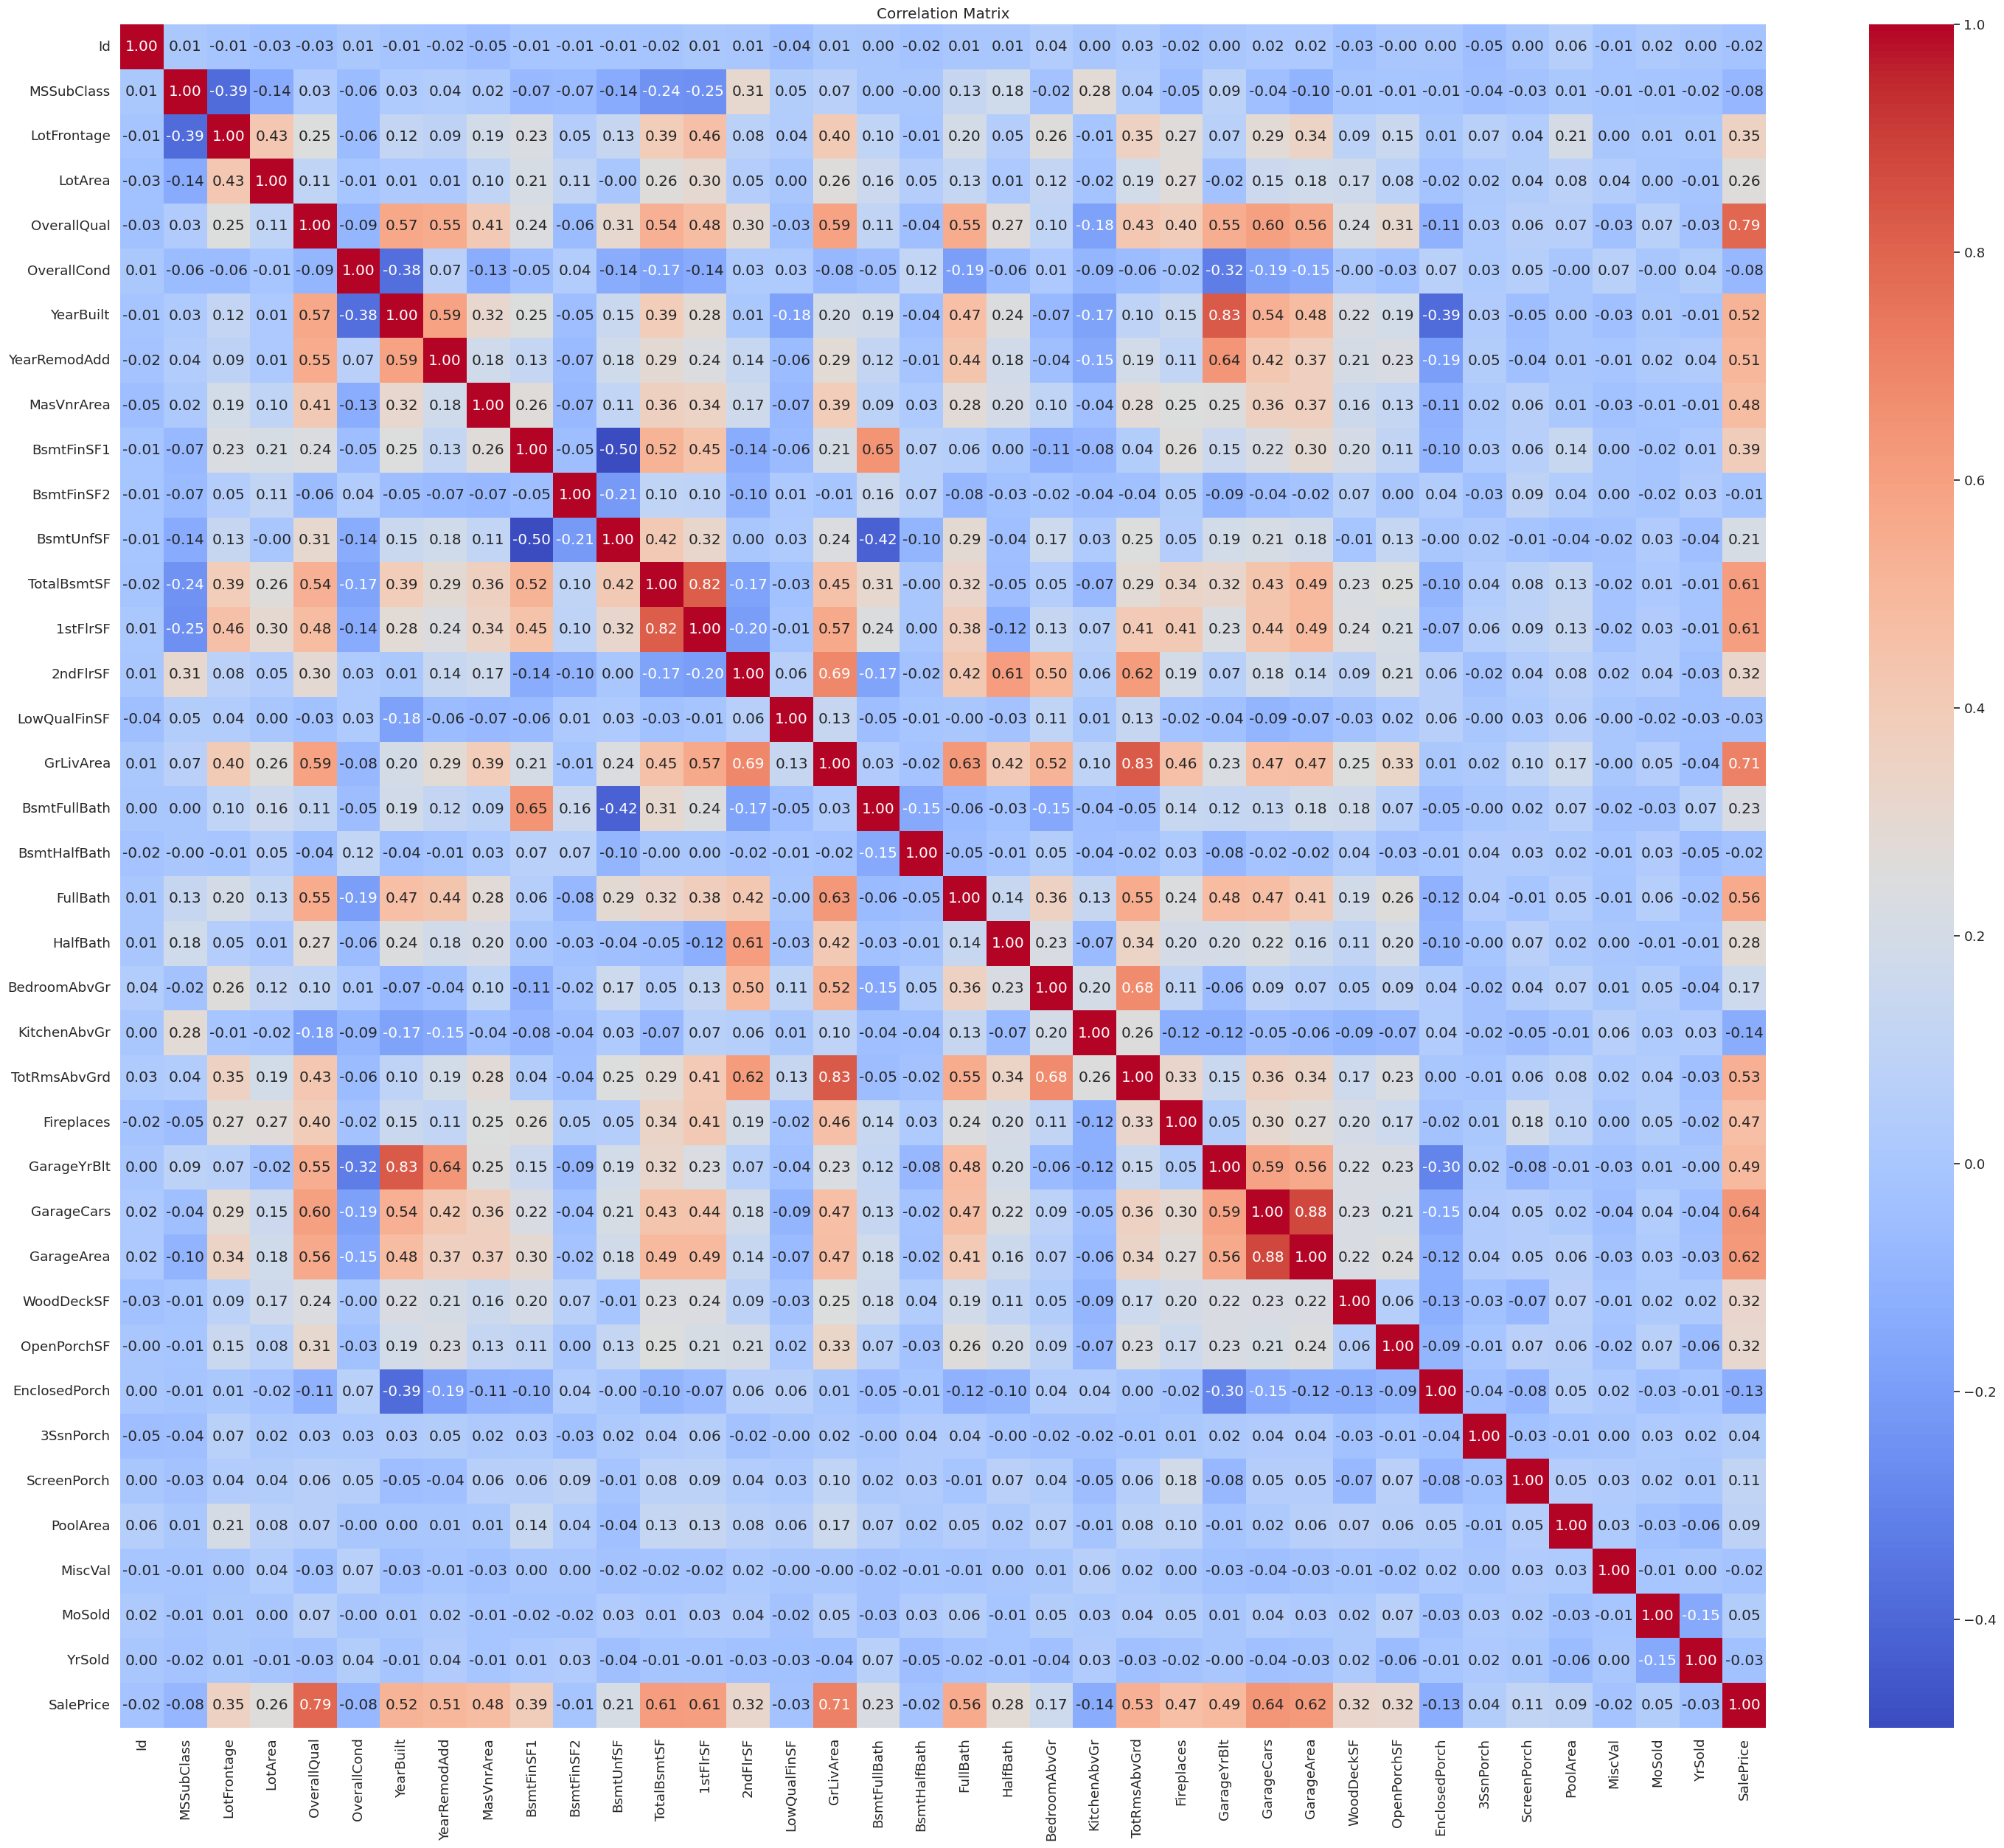

In [10]:
# Матрица корреляций
plt.figure(figsize=(36, 30))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # - убирает верхний треугольник (нужно прокинуть в sns.heatmap()
# Создает тепловую карту корреляций
    # annot=True: Отображает числовые значения корреляции
    # cmap='coolwarm': Цветовая схема
    #     Красный: Положительная корреляция
    #     Синий: Отрицательная корреляция
    #     Белый/светлый: Слабая корреляция
    # fmt='.2f': Формат чисел (2 знака после запятой)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Диаграмма рассяния

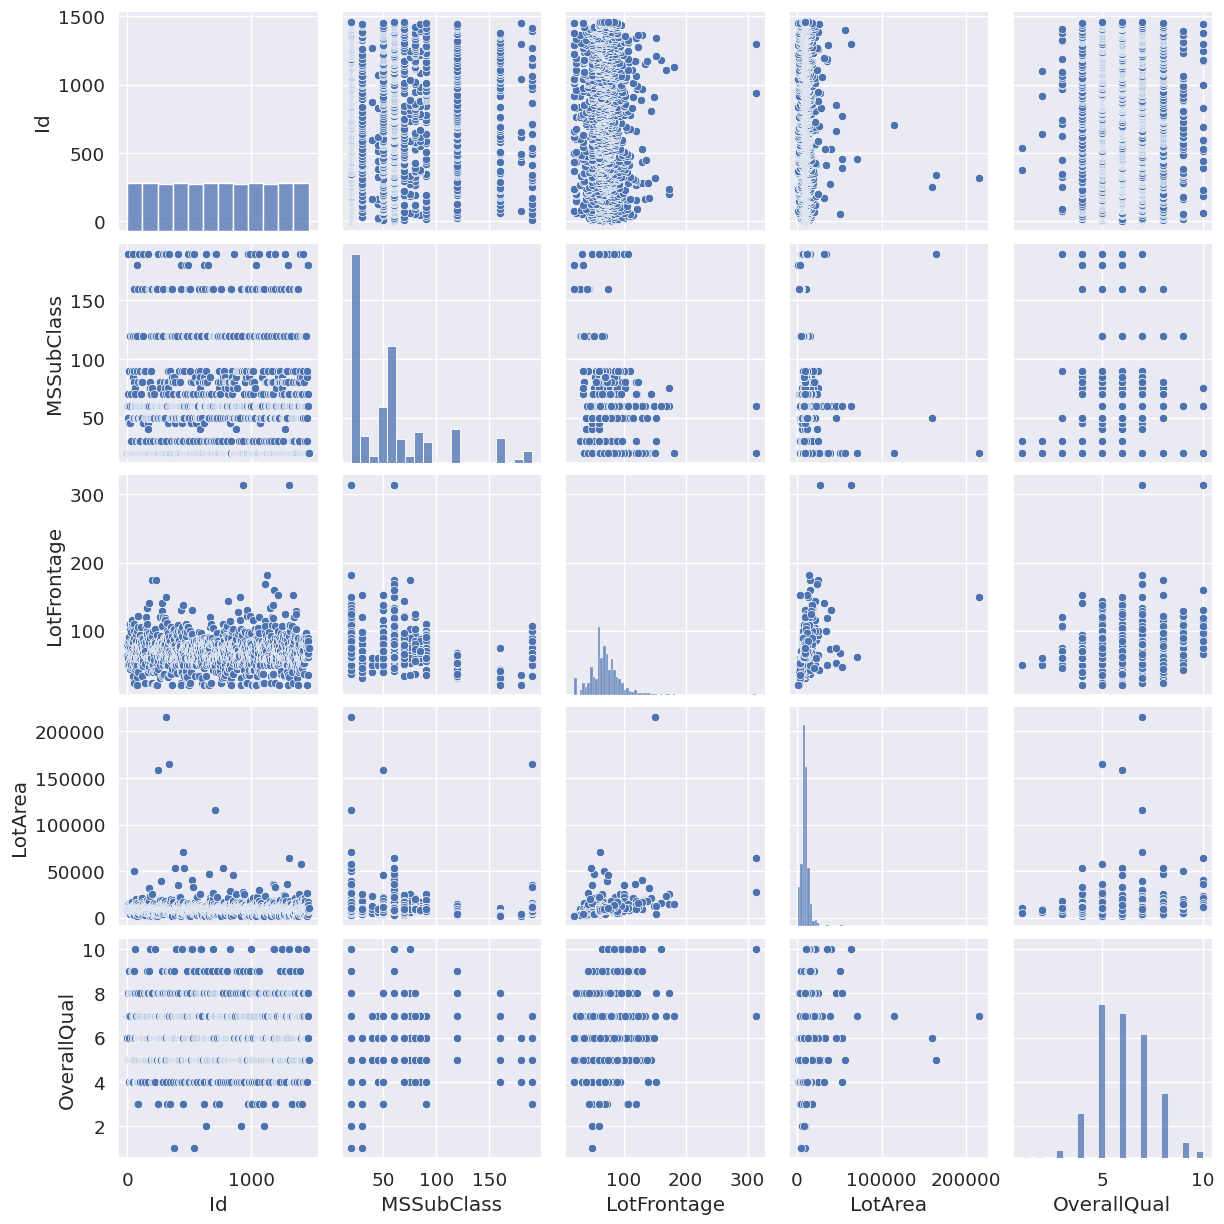

In [11]:
# Диаграмма рассеяния
sns.pairplot(df[numeric_cols[:5]])
plt.show()

# 3: Предобработка данных

## Обработка пропущенных значений

In [12]:
# првоерка пропущенных значений
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

#Заполнение пропусков средним значением
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
        # Методы заполнения: 
        #     .mean(): Среднее значение
        #     .median(): Медиана
        #     .mode()[0]: Модальное значение
            value = df[col].median()
            df[col] = df[col].fillna(value) #df[col].method(value) # df.method({col: value}, inplace=True) ## df[col] = df.fillna(value)
        else:
        #.mode() возвращает Series (даже если мода только одна). [0] извлекает 
        #первое значение из этой Series, которое и является модальным значением.
        #Если бы вы использовали просто df[col].fillna(df[col].mode()), pandas 
        #попытался бы заполнить пропущенные значения целой Series, что привело 
        #бы к ошибке.
            df[col] = df[col].fillna(df[col].mode()[0])

# Проверка результата
print("Результат:")
print(df.isnull().sum().sum())

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Результат:
0


## Кодирование категориальных признаков

In [13]:
# Определение категориальных признаков
# df.select_dtypes(include=['object']) - возвращает DataFrame
# .columns возвращает список названий (индексов) столбцов
categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)
print(type(categorical_cols))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [14]:

# One-hot кодирование. Возвращает булевый DataFrame маску
# drop_first=True - удаляет первый по алфавиту признак, делает его базовым (вычисляется
# через два остальные значения)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Выводит размер (количество строк и столбцов) закодированного DataFrame df_encoded
print(df_encoded.shape)
# Выводит имена столбцов закодированного DataFrame df_encoded.
print(df_encoded.columns)

(1460, 246)
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=246)


## Масштабирование числовых признаков

In [15]:
from sklearn.preprocessing import StandardScaler

# Определение числовых признаков
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создание объекта StandardScaler
scaler = StandardScaler()

# Масштабирование числовых признаков
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Просмотр результата
print(df[numeric_cols].describe())

                Id    MSSubClass   LotFrontage       LotArea   OverallQual  \
count  1460.000000  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean      0.000000 -8.455945e-17  2.798370e-16 -5.840077e-17  1.387018e-16   
std       1.000343  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00   
min      -1.730865 -8.725628e-01 -2.219047e+00 -9.237292e-01 -3.688413e+00   
25%      -0.865432 -8.725628e-01 -4.479400e-01 -2.969908e-01 -7.951515e-01   
50%       0.000000 -1.631095e-01 -3.922314e-02 -1.040633e-01 -7.183611e-02   
75%       0.865432  3.098594e-01  4.149067e-01  1.087080e-01  6.514792e-01   
max       1.730865  3.147673e+00  1.104155e+01  2.051827e+01  2.821425e+00   

        OverallCond     YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1  \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean   3.540547e-16  1.046347e-15  4.496860e-15 -3.893385e-17 -2.433366e-17   
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+0